# **Using Pycaret to evaluate the TS models**

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially 


https://pycaret.readthedocs.io/en/latest/index.html

https://towardsdatascience.com/announcing-pycarets-new-time-series-module-b6e724d4636c

### **Installation and Import**

In [ ]:
# Installing Pycaret slim version
# !pip install Pycaret
!pip install pycaret-ts-alpha

     |████████████████████████████████| 488 kB 7.7 MB/s 
     |████████████████████████████████| 56 kB 6.1 MB/s 
     |████████████████████████████████| 6.2 MB 11.4 MB/s 
     |████████████████████████████████| 167 kB 36.9 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 2.0 MB 43.8 MB/s 
     |████████████████████████████████| 1.3 MB 78.4 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 1.7 MB 21.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 57.4 MB/s 
     |████████████████████████████████| 15.5 MB 13.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 113 kB 80.9 MB/s 
     |████████████████████████████████| 1.4 MB 23.5 MB/s 
     |█████████████████

In [ ]:
# Import the packages
import pandas as pd
import numpy as np
from pycaret.time_series import *
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/input.xlsx')

In [ ]:
df.head()

,Date,SalesVolume
0,1995-01-01,47639.0
1,1995-02-01,47880.0
2,1995-03-01,67025.0
3,1995-04-01,56925.0
4,1995-05-01,64192.0


In [ ]:
df = df.dropna()
df['Date'] = pd.DatetimeIndex(df['Date'])
df = df.groupby('Date').sum()
#Settting a Monthly frequency and also to the first day of the month
df = df.asfreq('MS')

In [ ]:
df.head()

,SalesVolume
Date,
1995-01-01,47639.0
1995-02-01,47880.0
1995-03-01,67025.0
1995-04-01,56925.0
1995-05-01,64192.0


In [ ]:
# df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/USD_GBP_EX_RATE.xlsx')
# df['DEXUSUK']=df['DEXUSUK'].mask(df['DEXUSUK']==0)
# df = df.fillna(method='ffill')
# df['DEXUSUK']=df['DEXUSUK'].mask(df['DEXUSUK']==0).fillna(df['DEXUSUK'].mean())
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=4, weights="uniform")
# reshape_ip = np.array(df['DEXUSUK']).reshape(-1,1)
# reshape_op = imputer.fit_transform(reshape_ip)
# df['DEXUSUK'] = reshape_op
# df['observation_date'] = pd.DatetimeIndex(df['observation_date'])
# df = df.groupby('observation_date').sum()
# df = df.asfreq('D')

In [ ]:
# df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/ICERATES1100GBP30Y.xlsx')
# df['Date'] = pd.DatetimeIndex(df['Date'])
# r = pd.date_range(start=df.Date.min(), end=df.Date.max())
# df = df.set_index('Date').reindex(r).fillna(0.0).rename_axis('Date').reset_index()
# # df['SalesVolume']=df['SalesVolume'].mask(df['SalesVolume']==0)
# # df['SalesVolume'].fillna(method='ffill',inplace = True)
# # df['SalesVolume']=df['SalesVolume'].mask(df['SalesVolume']==0).fillna(df['SalesVolume'].mean())
# # from sklearn.impute import KNNImputer
# # imputer = KNNImputer(n_neighbors=4, weights="uniform")
# # reshape_ip = np.array(df['SalesVolume']).reshape(-1,1)
# # reshape_op = imputer.fit_transform(reshape_ip)
# # df['SalesVolume'] = reshape_op
# df = df.groupby('Date').sum()
# df = df.asfreq('D')
# df['SalesVolume'] = df['SalesVolume'].replace(to_replace =0,method = 'ffill')
# df['A'].replace(to_replace=0, method='ffill')
# # df['SalesVolume']=df['SalesVolume'].mask(df['SalesVolume']==0)

In [ ]:
df.head(30)

,SalesVolume
Date,
1995-01-01,47639.0
1995-02-01,47880.0
1995-03-01,67025.0
1995-04-01,56925.0
1995-05-01,64192.0
1995-06-01,72640.0
1995-07-01,64242.0
1995-08-01,69269.0
1995-09-01,67251.0


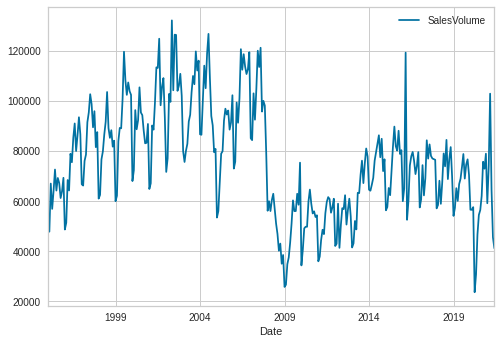

In [ ]:
df.plot()

### **EDA using Pycaret**

In [ ]:
# with functional API
setup(df['SalesVolume'], fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(318, 1)"
2,Missing Values,False
3,Transformed Train Set,"(311,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


In [ ]:
# with new object-oriented API
exp = TimeSeriesExperiment()
exp.setup(df, fh = 7, fold = 3, session_id = 123)
exp.models()

,Description,Value
0,session_id,123
1,Original Data,"(318, 1)"
2,Missing Values,False
3,Transformed Train Set,"(311,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


## **Plotting**

In [ ]:
# Without any argument, this will plot the original dataset
exp.plot_model()

In [ ]:
# ACF and PACF for the original dataset
exp.plot_model(plot="acf")

In [ ]:
# NOTE: you can customize the plots with kwargs - e.g. number of lags, figure size (width, height), etc
# data_kwargs such as `nlags` are passed to the underlying functon that gets the ACF values
# figure kwargs such as `fig_size` & `fig_template` are passed to plotly and can have any value that plotly accepts
exp.plot_model(plot="pacf", data_kwargs={'nlags':36, }, fig_kwargs={'fig_size': [800, 500], 'fig_template': 'simple_white'})

In [ ]:
exp.plot_model(plot="decomp_classical")
exp.plot_model(plot="decomp_classical", data_kwargs={'type': 'additive'})
exp.plot_model(plot="decomp_stl")

In [ ]:
# Show the train-test splits on the dataset
# Internally split - len(fh) as test set, remaining used as test set
exp.plot_model(plot="train_test_split")

# Show the Cross Validation splits inside the train set
exp.plot_model(plot="cv")

In [ ]:
# Plot diagnostics
exp.plot_model(plot="diagnostics")

In [ ]:
exp.check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,318
1,Summary,Statistics,Mean,,76225.5
2,Summary,Statistics,Median,,75924
3,Summary,Statistics,Standard Deviation,,21928.4
4,Summary,Statistics,Variance,,4.80856e+08
5,Summary,Statistics,Kurtosis,,-0.459261
6,Summary,Statistics,Skewness,,0.208777
7,Summary,Statistics,# Distinct Values,,316
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",1922.53
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",2443.54


In [ ]:
# object-oriented API
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
arima,ARIMA,5267.49,8256.75,0.1343,0.0994,0.4113,0.486,0.0700
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,8327.54,11070.3,0.1739,0.1491,0.6498,0.0607,0.0267
auto_arima,Auto ARIMA,8180.96,11658.1,0.1787,0.1552,0.6414,0.1509,25.5100
snaive,Seasonal Naive Forecaster,8939.76,12834.6,0.224,0.1601,0.7007,-0.098,0.0167
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,9039.86,12026.4,0.1965,0.1659,0.7063,-0.0661,0.0300
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,9249.21,12309.8,0.1988,0.1699,0.7228,-0.1085,0.0267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,9249.21,12309.8,0.1988,0.1699,0.7228,-0.1085,0.0267
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,9249.21,12309.8,0.1988,0.1699,0.7228,-0.1085,0.0300
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,9249.21,12309.8,0.1988,0.1699,0.7228,-0.1085,0.0300
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,9258.31,12286,0.199,0.1699,0.7234,-0.11,0.0267


In [ ]:
#Best model parameters
best

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [ ]:
# create fbprophet model
prophet = exp.create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2019-02-28,10062.2476,10504.8515,0.1465,0.1357,0.7712,-2.5711
1,2019-09-30,11405.3938,18197.0775,0.3443,0.2110,0.8909,-0.1884
2,2020-04-30,21483.2853,25822.4290,0.4824,0.3446,1.6938,-2.2584
Mean,NaT,14316.9755,18174.7860,0.3244,0.2304,1.1186,-1.6726
SD,NaT,5096.9276,6253.3947,0.1379,0.0864,0.4096,1.0573


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [ ]:
prophet

ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')

In [ ]:
plot_model(best, plot = 'forecast')

In [ ]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [ ]:
# in-sample plot
plot_model(best, plot = 'insample')

In [ ]:
# finalize model
final_best = finalize_model(best)
# generate predictions
predict_model(final_best, fh = 24)

2021-07     50379.1485
2021-08     53314.7995
2021-09     59712.5149
2021-10     73908.9828
2021-11     71576.9966
2021-12     77901.4951
2022-01     58384.8862
2022-02     73274.8228
2022-03    102455.5593
2022-04     64287.9893
2022-05     45323.4379
2022-06     41042.2669
2022-07     50240.4867
2022-08     53215.1669
2022-09     59642.7087
2022-10     73861.9704
2022-11     71547.4033
2022-12     77885.2137
2023-01     58378.7779
2023-02     73276.4887
2023-03    102463.1665
2023-04     64300.1369
2023-05     45339.0552
2023-06     41060.5358
Freq: M, Name: SalesVolume, dtype: float64